In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_excel("Customer Churn Data.xlsx", "Data for DSBA")

In [3]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
df.shape

(11260, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [7]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [8]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [9]:
df['Tenure'].unique()

array([4, 0, 2, 13, 11, '#', 9, 99, 19, 20, 14, 8, 26, 18, 5, 30, 7, 1,
       23, 3, 29, 6, 28, 24, 25, 16, 10, 15, 22, nan, 27, 12, 21, 17, 50,
       60, 31, 51, 61], dtype=object)

In [10]:
df['Account_user_count'].unique()

array([3, 4, nan, 5, 2, '@', 1, 6], dtype=object)

In [11]:
df['rev_per_month'].unique()

array([9, 7, 6, 8, 3, 2, 4, 10, 1, 5, '+', 130, nan, 19, 139, 102, 120,
       138, 127, 123, 124, 116, 21, 126, 134, 113, 114, 108, 140, 133,
       129, 107, 118, 11, 105, 20, 119, 121, 137, 110, 22, 101, 136, 125,
       14, 13, 12, 115, 23, 122, 117, 131, 104, 15, 25, 135, 111, 109,
       100, 103], dtype=object)

In [12]:
df['coupon_used_for_payment'].unique()

array([1, 0, 4, 2, 9, 6, 11, 7, 12, 10, 5, 3, 13, 15, 8, '#', '$', 14,
       '*', 16], dtype=object)

In [13]:
df['Day_Since_CC_connect'].unique()

array([5, 0, 3, 7, 2, 1, 8, 6, 4, 15, nan, 11, 10, 9, 13, 12, 17, 16, 14,
       30, '$', 46, 18, 31, 47], dtype=object)

In [14]:
df['Tenure'] = df['Account_user_count'].replace('#',np.NaN)
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)
df['cashback'] = df['cashback'].replace('$',np.NaN)
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df["Gender"] = df["Gender"].replace("M", 'Male').replace("F", 'Female')

In [15]:
df['Tenure'] = df['Account_user_count'].astype('float64')
df['Account_user_count'] = df['Account_user_count'].astype('float64')
df['rev_per_month'] = df['rev_per_month'].astype('float64')
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float64')
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('float64')
df['cashback'] = df['cashback'].astype('float64')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   10816 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [17]:
df["Gender"].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
Tenure,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
Account_user_count,10816.0,3.692862,1.022976,1.0,3.00,4.00,4.00,6.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
rev_per_month,10469.0,6.362594,11.909686,1.0,3.00,5.00,7.00,140.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


In [19]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [20]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

14

Description of AccountID
----------------------------------------------------------------------------
count    11260.00000
mean     25629.50000
std       3250.62635
min      20000.00000
25%      22814.75000
50%      25629.50000
75%      28444.25000
max      31259.00000
Name: AccountID, dtype: float64 Distribution of AccountID
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


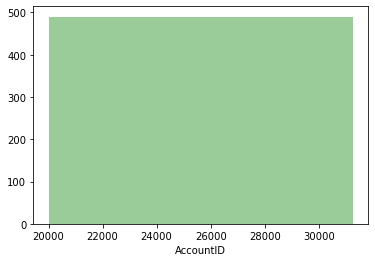

BoxPlot of AccountID
----------------------------------------------------------------------------


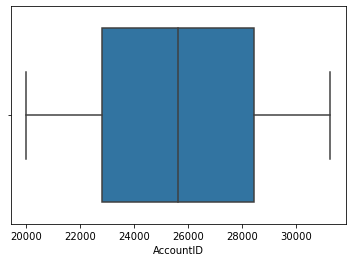

Description of Churn
----------------------------------------------------------------------------
count    11260.000000
mean         0.168384
std          0.374223
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Churn, dtype: float64 Distribution of Churn
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


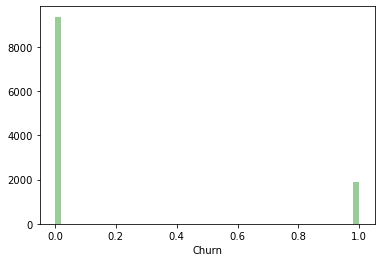

BoxPlot of Churn
----------------------------------------------------------------------------


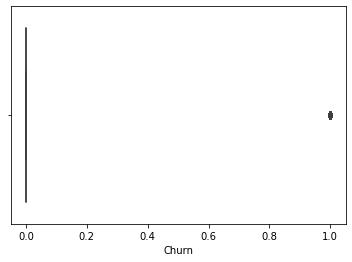

Description of Tenure
----------------------------------------------------------------------------
count    10816.000000
mean         3.692862
std          1.022976
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Tenure, dtype: float64 Distribution of Tenure
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


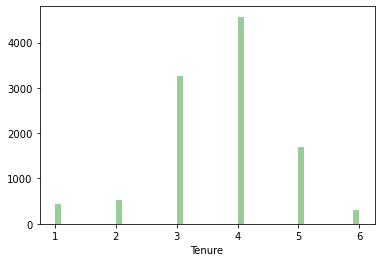

BoxPlot of Tenure
----------------------------------------------------------------------------


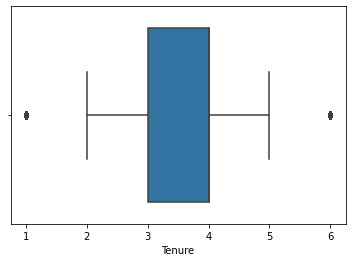

Description of City_Tier
----------------------------------------------------------------------------
count    11148.000000
mean         1.653929
std          0.915015
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: City_Tier, dtype: float64 Distribution of City_Tier
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


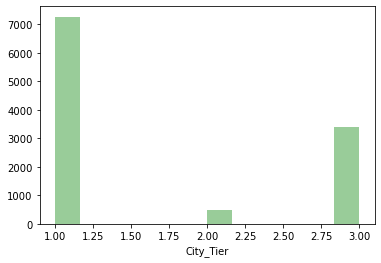

BoxPlot of City_Tier
----------------------------------------------------------------------------


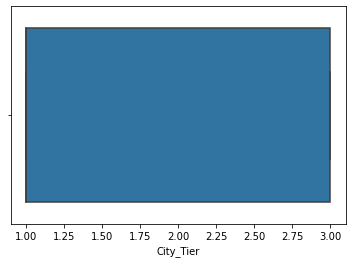

Description of CC_Contacted_LY
----------------------------------------------------------------------------
count    11158.000000
mean        17.867091
std          8.853269
min          4.000000
25%         11.000000
50%         16.000000
75%         23.000000
max        132.000000
Name: CC_Contacted_LY, dtype: float64 Distribution of CC_Contacted_LY
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


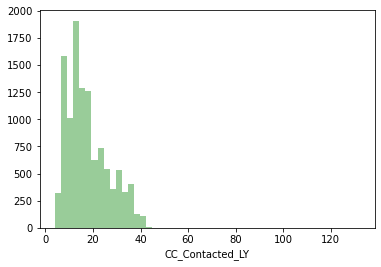

BoxPlot of CC_Contacted_LY
----------------------------------------------------------------------------


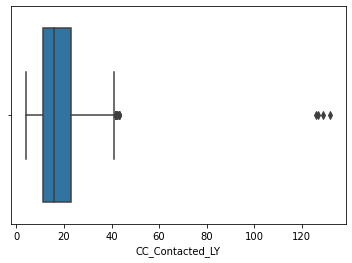

Description of Service_Score
----------------------------------------------------------------------------
count    11162.000000
mean         2.902526
std          0.725584
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: Service_Score, dtype: float64 Distribution of Service_Score
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


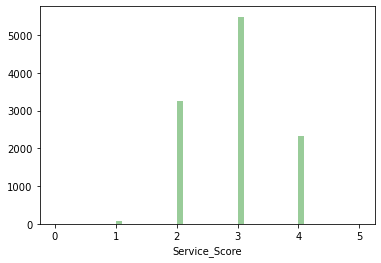

BoxPlot of Service_Score
----------------------------------------------------------------------------


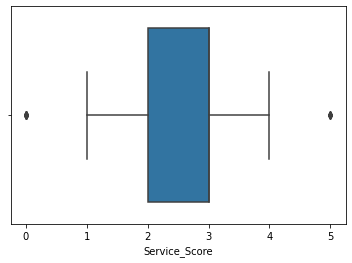

Description of Account_user_count
----------------------------------------------------------------------------
count    10816.000000
mean         3.692862
std          1.022976
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: Account_user_count, dtype: float64 Distribution of Account_user_count
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


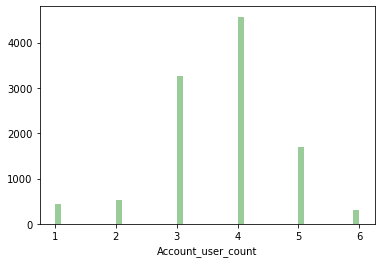

BoxPlot of Account_user_count
----------------------------------------------------------------------------


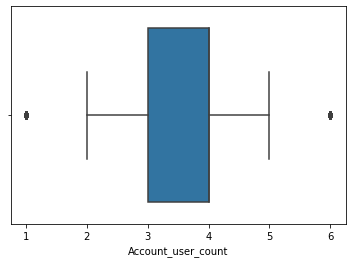

Description of CC_Agent_Score
----------------------------------------------------------------------------
count    11144.000000
mean         3.066493
std          1.379772
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: CC_Agent_Score, dtype: float64 Distribution of CC_Agent_Score
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


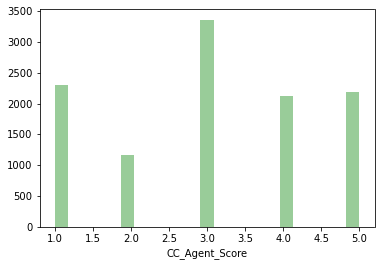

BoxPlot of CC_Agent_Score
----------------------------------------------------------------------------


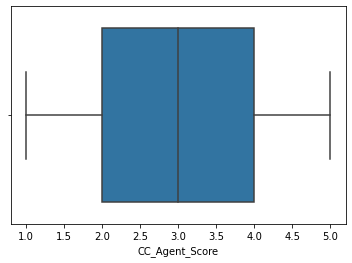

Description of rev_per_month
----------------------------------------------------------------------------
count    10469.000000
mean         6.362594
std         11.909686
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        140.000000
Name: rev_per_month, dtype: float64 Distribution of rev_per_month
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


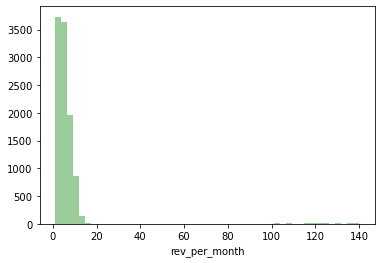

BoxPlot of rev_per_month
----------------------------------------------------------------------------


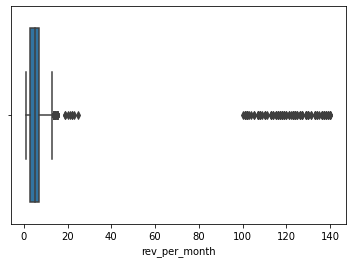

Description of Complain_ly
----------------------------------------------------------------------------
count    10903.000000
mean         0.285334
std          0.451594
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Complain_ly, dtype: float64 Distribution of Complain_ly
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


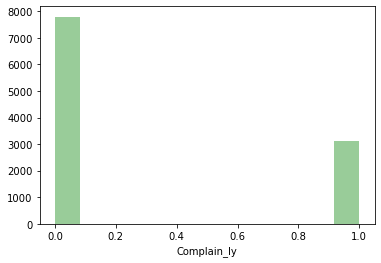

BoxPlot of Complain_ly
----------------------------------------------------------------------------


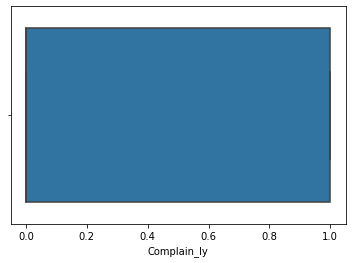

Description of rev_growth_yoy
----------------------------------------------------------------------------
count    11257.000000
mean        16.193391
std          3.757721
min          4.000000
25%         13.000000
50%         15.000000
75%         19.000000
max         28.000000
Name: rev_growth_yoy, dtype: float64 Distribution of rev_growth_yoy
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


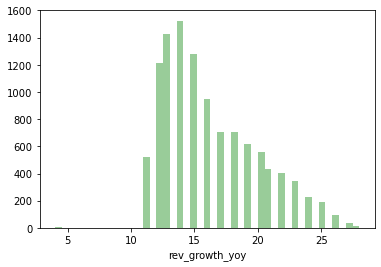

BoxPlot of rev_growth_yoy
----------------------------------------------------------------------------


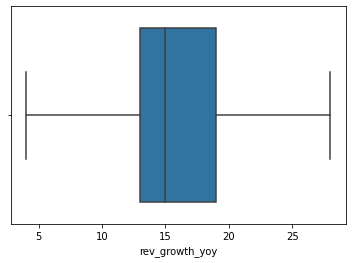

Description of coupon_used_for_payment
----------------------------------------------------------------------------
count    11257.000000
mean         1.790619
std          1.969551
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: coupon_used_for_payment, dtype: float64 Distribution of coupon_used_for_payment
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


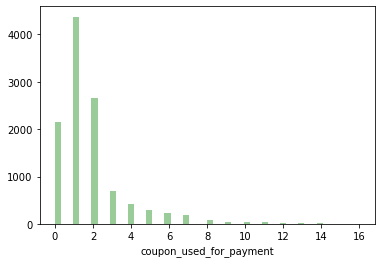

BoxPlot of coupon_used_for_payment
----------------------------------------------------------------------------


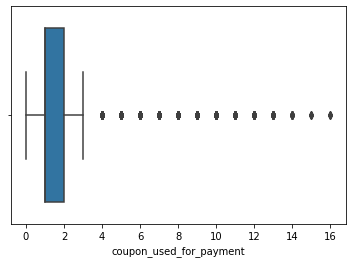

Description of Day_Since_CC_connect
----------------------------------------------------------------------------
count    10902.000000
mean         4.633187
std          3.697637
min          0.000000
25%          2.000000
50%          3.000000
75%          8.000000
max         47.000000
Name: Day_Since_CC_connect, dtype: float64 Distribution of Day_Since_CC_connect
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


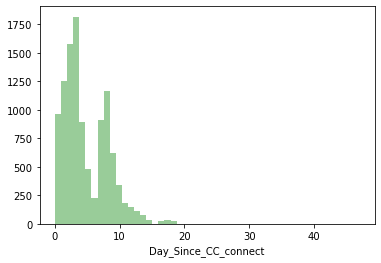

BoxPlot of Day_Since_CC_connect
----------------------------------------------------------------------------


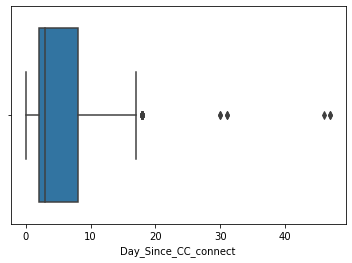

Description of cashback
----------------------------------------------------------------------------
count    10787.000000
mean       196.236370
std        178.660514
min          0.000000
25%        147.210000
50%        165.250000
75%        200.010000
max       1997.000000
Name: cashback, dtype: float64 Distribution of cashback
----------------------------------------------------------------------------


C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


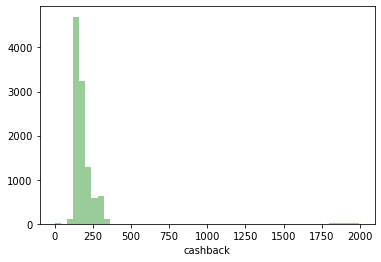

BoxPlot of cashback
----------------------------------------------------------------------------


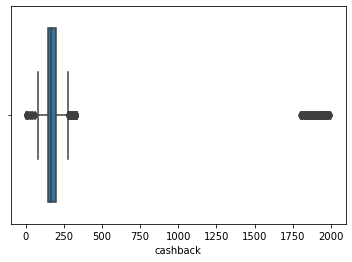

In [21]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:xlabel='Payment', ylabel='count'>

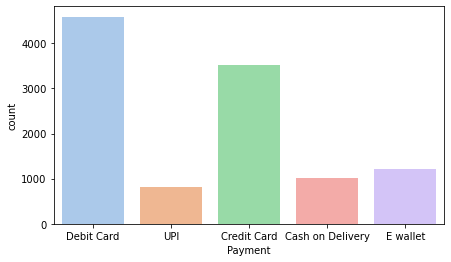

In [22]:
plt.figure(figsize=(7,4)) 
sns.countplot(x='Payment', data=df, palette='pastel')

<AxesSubplot:xlabel='Gender', ylabel='count'>

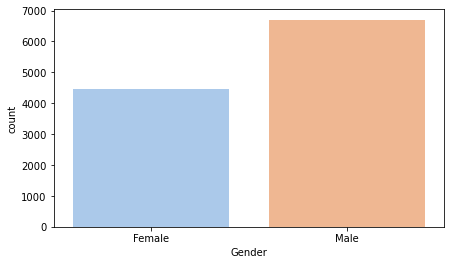

In [23]:
plt.figure(figsize=(7,4)) 
sns.countplot(x='Gender', data=df, palette='pastel')

<AxesSubplot:xlabel='account_segment', ylabel='count'>

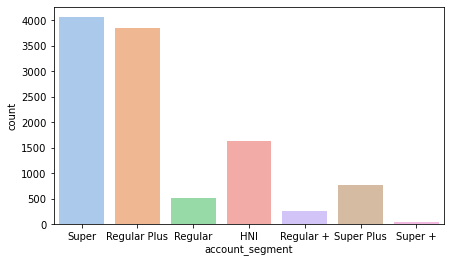

In [24]:
plt.figure(figsize=(7,4)) 
sns.countplot(x='account_segment', data=df, palette='pastel')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

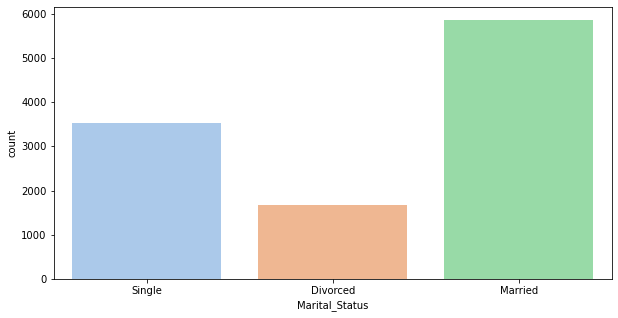

In [25]:
plt.figure(figsize=(10,5)) 
sns.countplot(x='Marital_Status', data=df, palette='pastel')

<AxesSubplot:xlabel='Login_device', ylabel='count'>

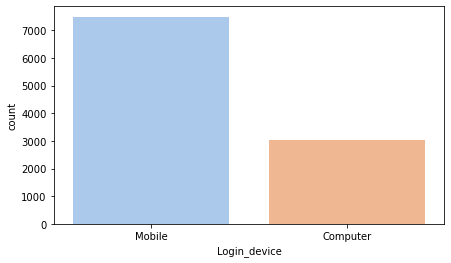

In [26]:
plt.figure(figsize=(7,4)) 
sns.countplot(x='Login_device', data=df, palette='pastel')

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

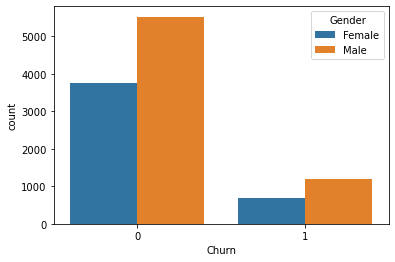

In [27]:
sns.countplot(df["Churn"],hue=df["Gender"])  

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

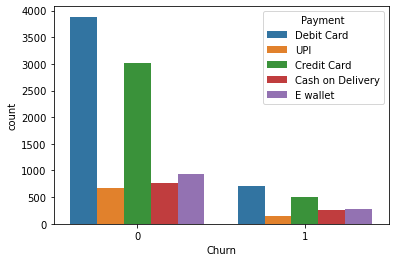

In [28]:
sns.countplot(df["Churn"],hue=df["Payment"])  

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

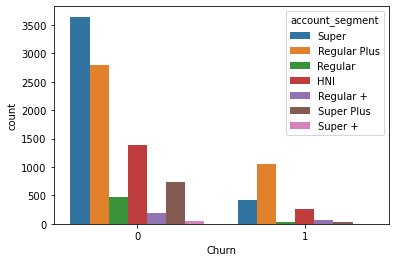

In [29]:
sns.countplot(df["Churn"],hue=df["account_segment"])  

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

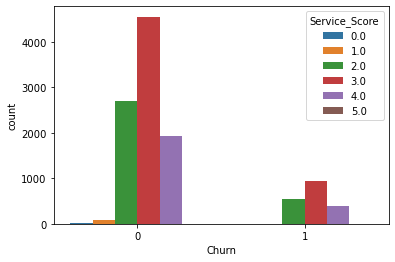

In [30]:
sns.countplot(df["Churn"],hue=df["Service_Score"])  

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

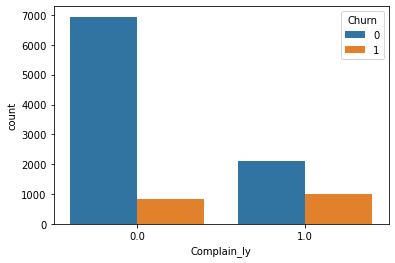

In [31]:
sns.countplot(df["Complain_ly"],hue=df["Churn"])  

C:\Users\Mihir Sharma\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Service_Score', ylabel='count'>

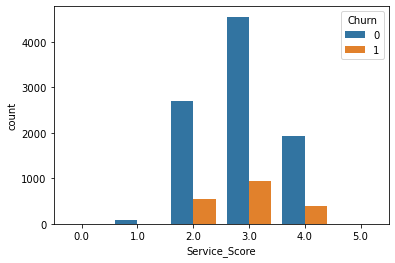

In [32]:
sns.countplot(df["Service_Score"],hue=df["Churn"])  

<AxesSubplot:xlabel='Gender', ylabel='Service_Score'>

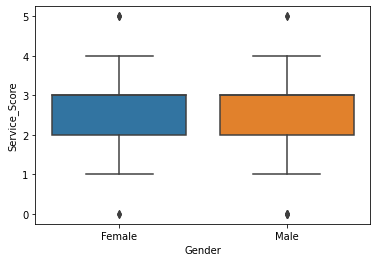

In [33]:
fig_dims = (12, 5)
sns.boxplot(x='Gender', y='Service_Score', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Gender'>

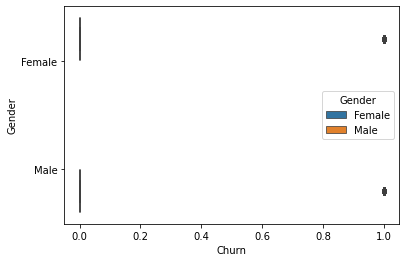

In [34]:
fig_dims = (12, 5)
sns.boxplot(x='Churn', y='Gender',hue='Gender', data=df)

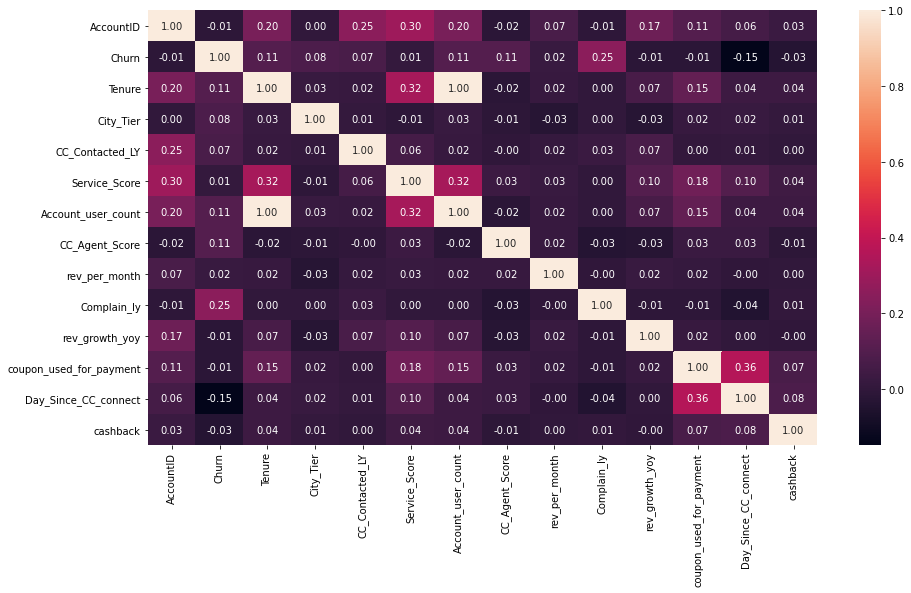

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [36]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [37]:
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [38]:
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [39]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].median())
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].median())

In [40]:
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].median())
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].median())
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [41]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [42]:
df['Login_device'].value_counts()

Mobile      8242
Computer    3018
Name: Login_device, dtype: int64

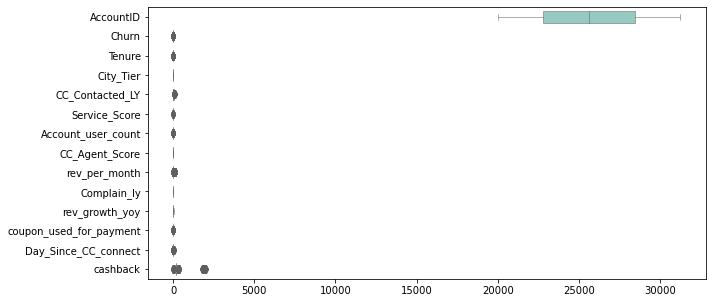

In [43]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [44]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [45]:
for feature in df[['CC_Contacted_LY','Service_Score','cashback','Day_Since_CC_connect','coupon_used_for_payment','Account_user_count','rev_per_month','Tenure']]:
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

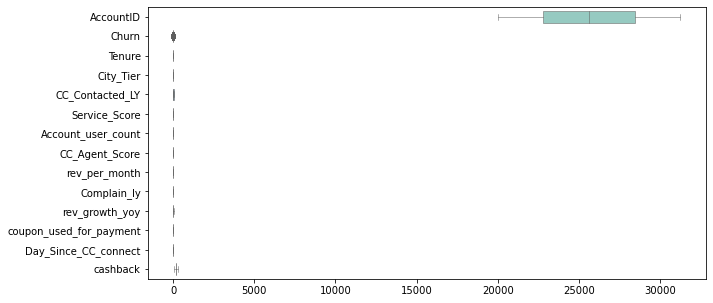

In [46]:
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=df,width=0.6,palette="Set3",orient='h',linewidth=0.5)

In [47]:
df["Churn"].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [48]:
df = df.drop(["AccountID"], axis=1)

In [49]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Payment
['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet']
Categories (5, object): ['Cash on Delivery', 'Credit Card', 'Debit Card', 'E wallet', 'UPI']
[2 4 1 0 3]


feature: Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


feature: account_segment
['Super', 'Regular Plus', 'Regular', 'HNI', 'Regular +', 'Super Plus', 'Super +']
Categories (7, object): ['HNI', 'Regular', 'Regular +', 'Regular Plus', 'Super', 'Super +', 'Super Plus']
[4 3 1 0 2 6 5]


feature: Marital_Status
['Single', 'Divorced', 'Married']
Categories (3, object): ['Divorced', 'Married', 'Single']
[2 0 1]


feature: Login_device
['Mobile', 'Computer']
Categories (2, object): ['Computer', 'Mobile']
[1 0]


In [50]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,3.0,3.0,6.0,2,0,3.0,3.0,4,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,1,4.0,1.0,8.0,4,1,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,1,4.0,1.0,30.0,2,1,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,1
3,1,4.0,3.0,15.0,2,1,2.0,4.0,4,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,1,3.0,1.0,12.0,1,1,2.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  int8   
 5   Gender                   11260 non-null  int8   
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  int8   
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  int8   
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [52]:
X = df.drop("Churn", axis=1)
y = df.pop("Churn")

In [53]:
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,3.0,3.0,6.0,2,0,3.0,3.0,4,2.0,2,9.0,1.0,11.0,1.0,5.0,159.93,1
1,4.0,1.0,8.0,4,1,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,0.0,120.90,1
2,4.0,1.0,30.0,2,1,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,3.0,165.25,1
3,4.0,3.0,15.0,2,1,2.0,4.0,4,5.0,2,8.0,0.0,23.0,0.0,3.0,134.07,1
4,3.0,1.0,12.0,1,1,2.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,3.0,129.60,1


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=1)

In [55]:
X_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
7580,4.0,1.0,22.0,2,1,0.5,4.0,4,5.0,1,7.0,0.0,15.0,1.0,2.0,163.88,1
5198,4.0,3.0,14.0,3,1,4.0,4.0,4,5.0,1,6.0,0.0,12.0,1.0,3.0,179.86,1
1929,3.0,1.0,14.0,2,1,3.0,3.0,1,1.0,1,2.0,0.0,13.0,3.5,9.0,271.44,0
3427,4.0,1.0,14.0,1,0,3.0,4.0,4,3.0,2,8.0,0.0,15.0,2.0,2.0,175.03,1
6249,5.0,1.0,22.0,1,0,3.0,5.0,4,4.0,0,6.0,0.0,15.0,1.0,0.0,149.77,1


In [56]:
X_test.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
784,1.5,1.0,31.0,2,0,2.0,1.5,3,2.0,2,2.0,1.0,12.0,1.0,1.0,129.94,1
6943,3.0,3.0,22.0,3,1,2.0,3.0,3,5.0,1,5.0,0.0,20.0,1.0,0.0,119.90,0
3709,5.0,3.0,23.0,3,0,4.0,5.0,4,5.0,0,6.0,0.0,14.0,2.0,3.0,181.47,1
6439,3.0,1.0,10.0,1,0,2.0,3.0,3,4.0,2,4.0,0.0,19.0,1.0,1.0,120.96,1
5310,2.0,1.0,25.0,2,1,3.0,2.0,4,5.0,1,3.0,0.0,12.0,2.0,11.0,177.08,1


## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [59]:
y_predict_train = Logistic_model.predict(X_train)
log_train_acc = Logistic_model.score(X_train, y_train)
log_train_acc

0.8567622430855113

In [60]:
y_predict_test = Logistic_model.predict(X_test)
log_test_acc = Logistic_model.score(X_test, y_test)
log_test_acc

0.8632326820603907

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
cflm=confusion_matrix(y_train, y_predict_train)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6556
           1       0.71      0.25      0.37      1326

    accuracy                           0.86      7882
   macro avg       0.79      0.61      0.64      7882
weighted avg       0.84      0.86      0.83      7882



<AxesSubplot:>

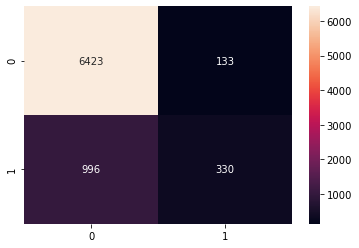

In [63]:
sns.heatmap(cflm, annot=True, fmt='g')

In [64]:
cflm1=confusion_matrix(y_test, y_predict_test)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2808
           1       0.76      0.27      0.40       570

    accuracy                           0.86      3378
   macro avg       0.82      0.63      0.66      3378
weighted avg       0.85      0.86      0.84      3378



<AxesSubplot:>

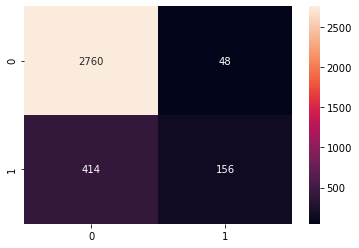

In [65]:
sns.heatmap(cflm1, annot=True,fmt='g')

AxesSubplot(0.125,0.125;0.775x0.755)


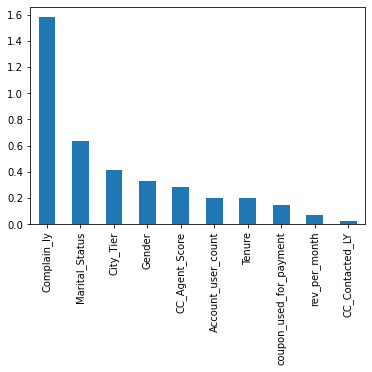

In [66]:
weights = pd.Series(Logistic_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AUC: 0.800


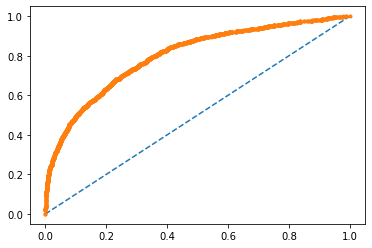

In [67]:
probs = Logistic_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.803


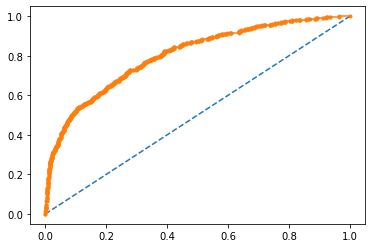

In [68]:
probs = Logistic_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

## Decision Tree

In [69]:
dtcl = DecisionTreeClassifier(criterion = 'gini' )
dtcl.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [71]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             verbose=1)

In [72]:
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50)

In [73]:
gs_dtcl.best_score_

0.8676729091090518

In [74]:
reg_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_dtcl.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

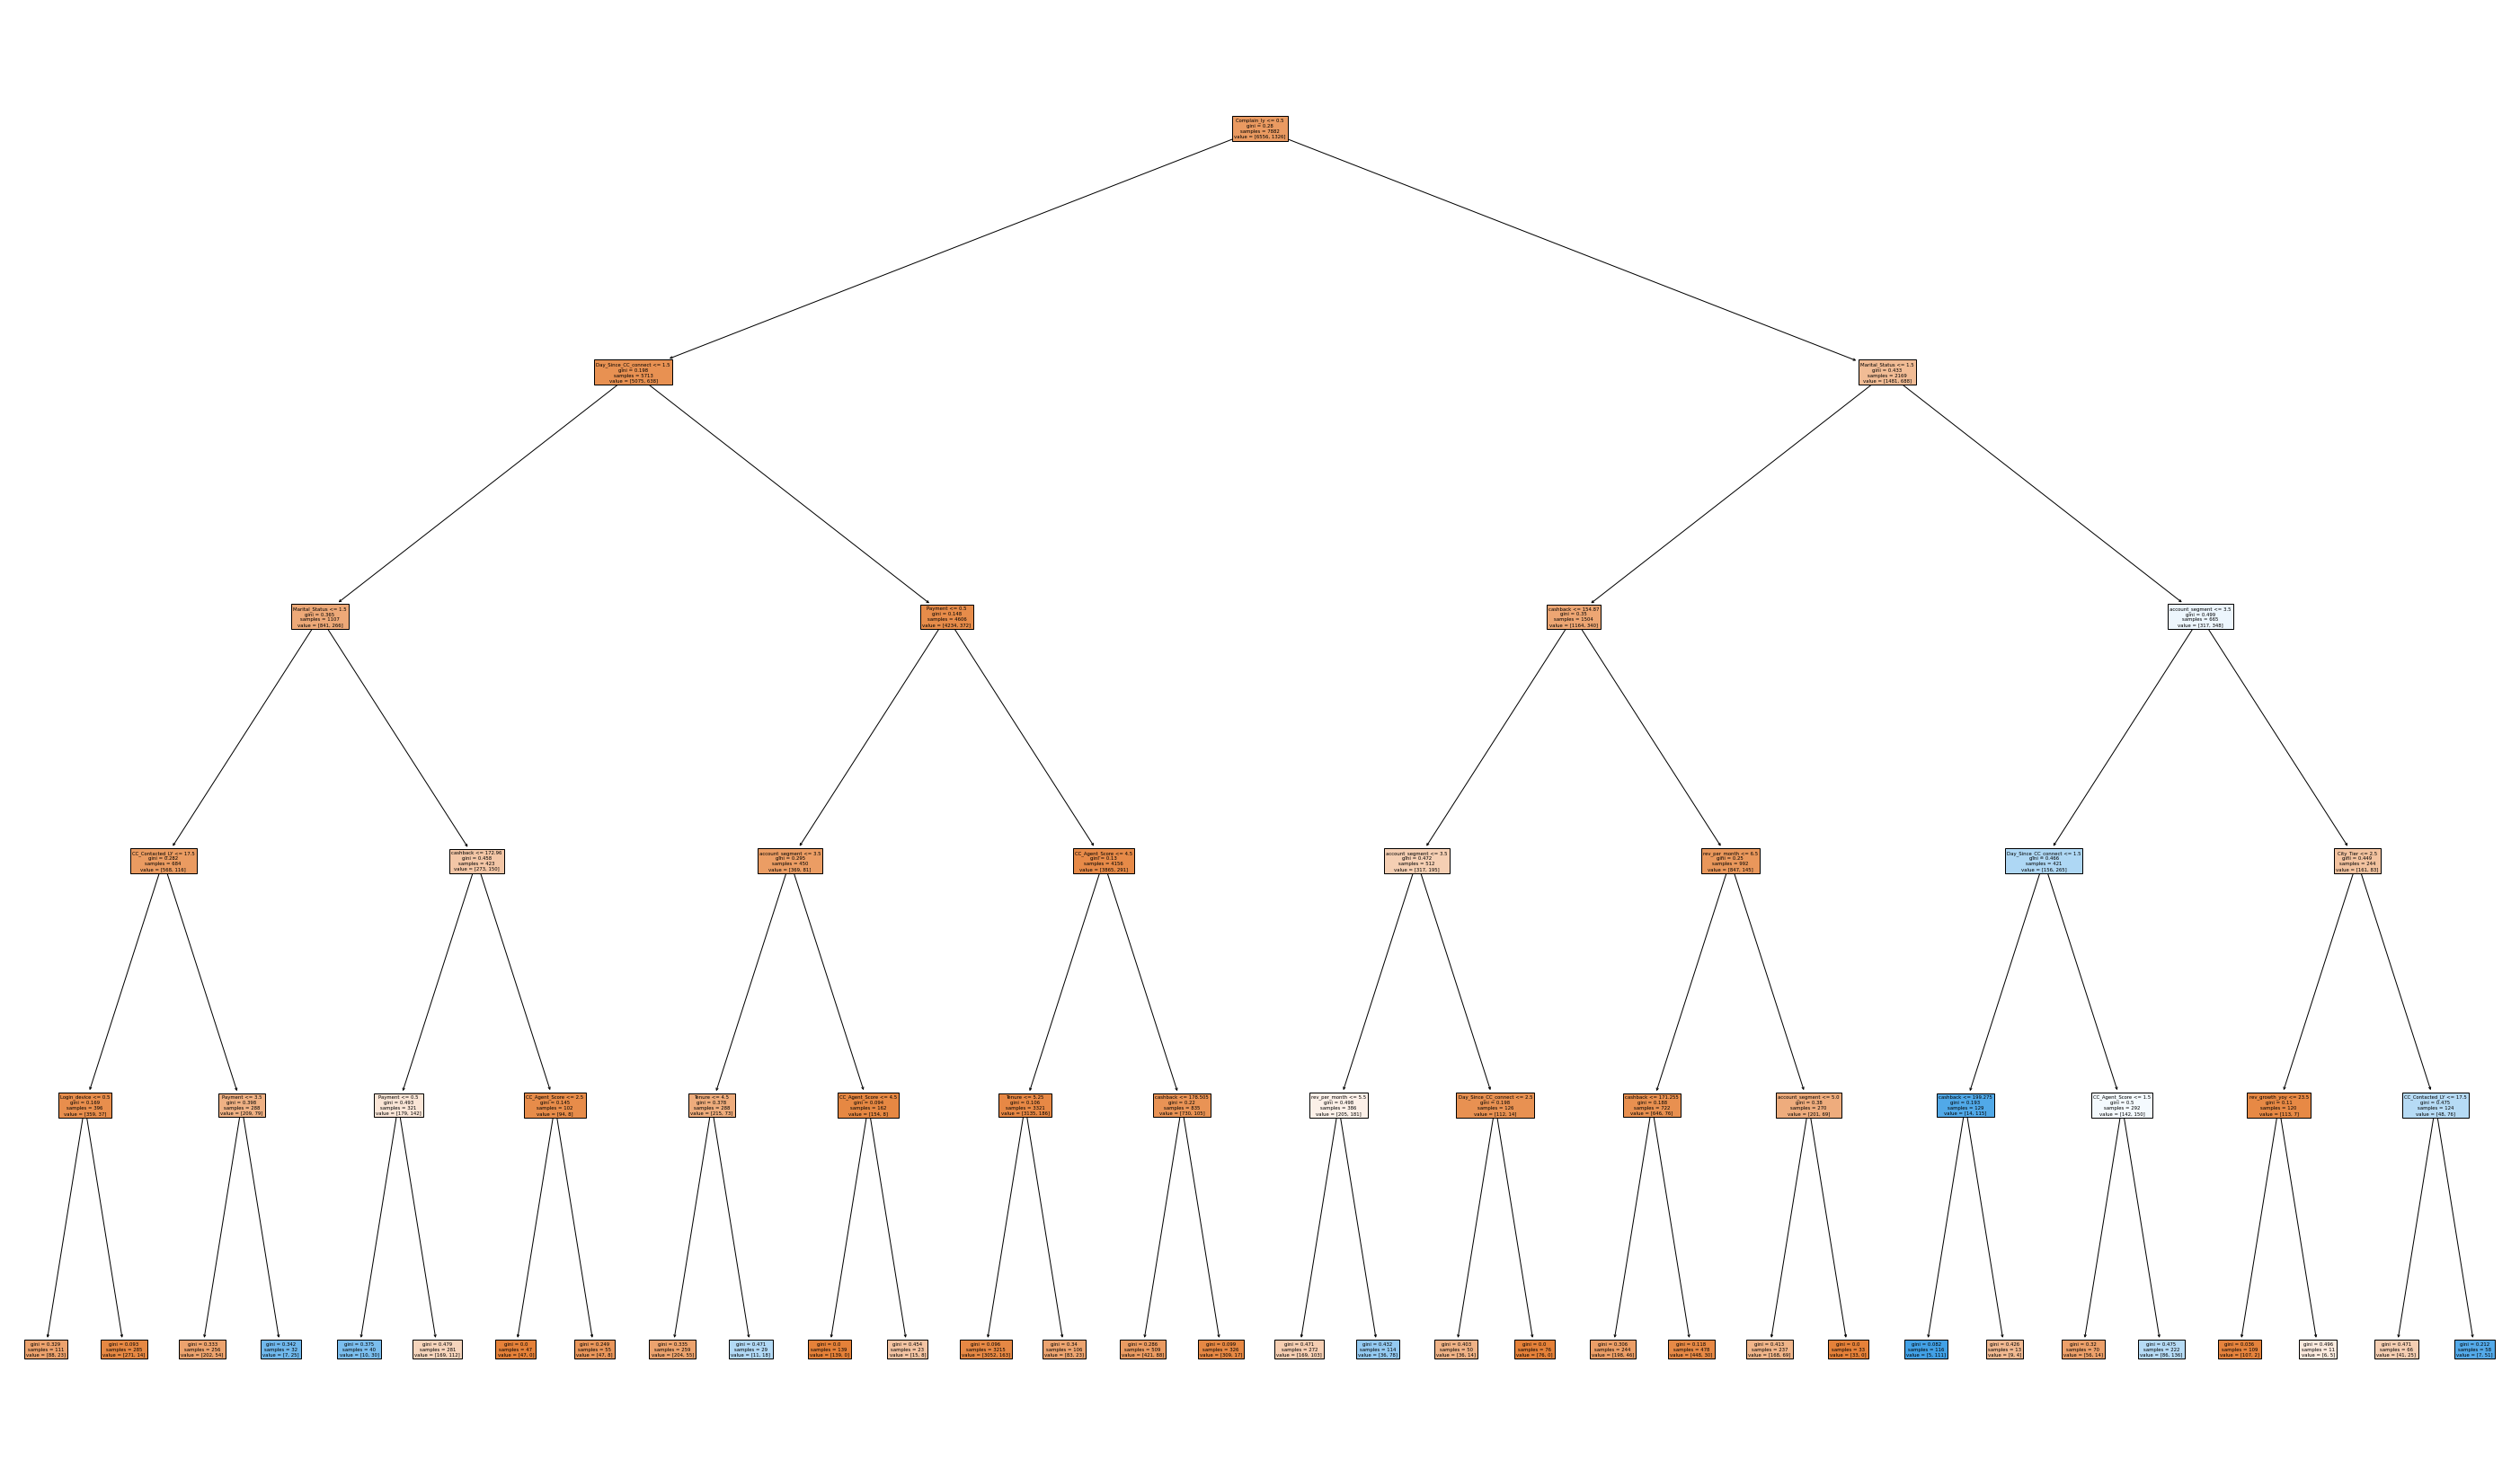

In [75]:
dot_data2 = tree.export_graphviz(reg_dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,30))
_ = tree.plot_tree(reg_dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

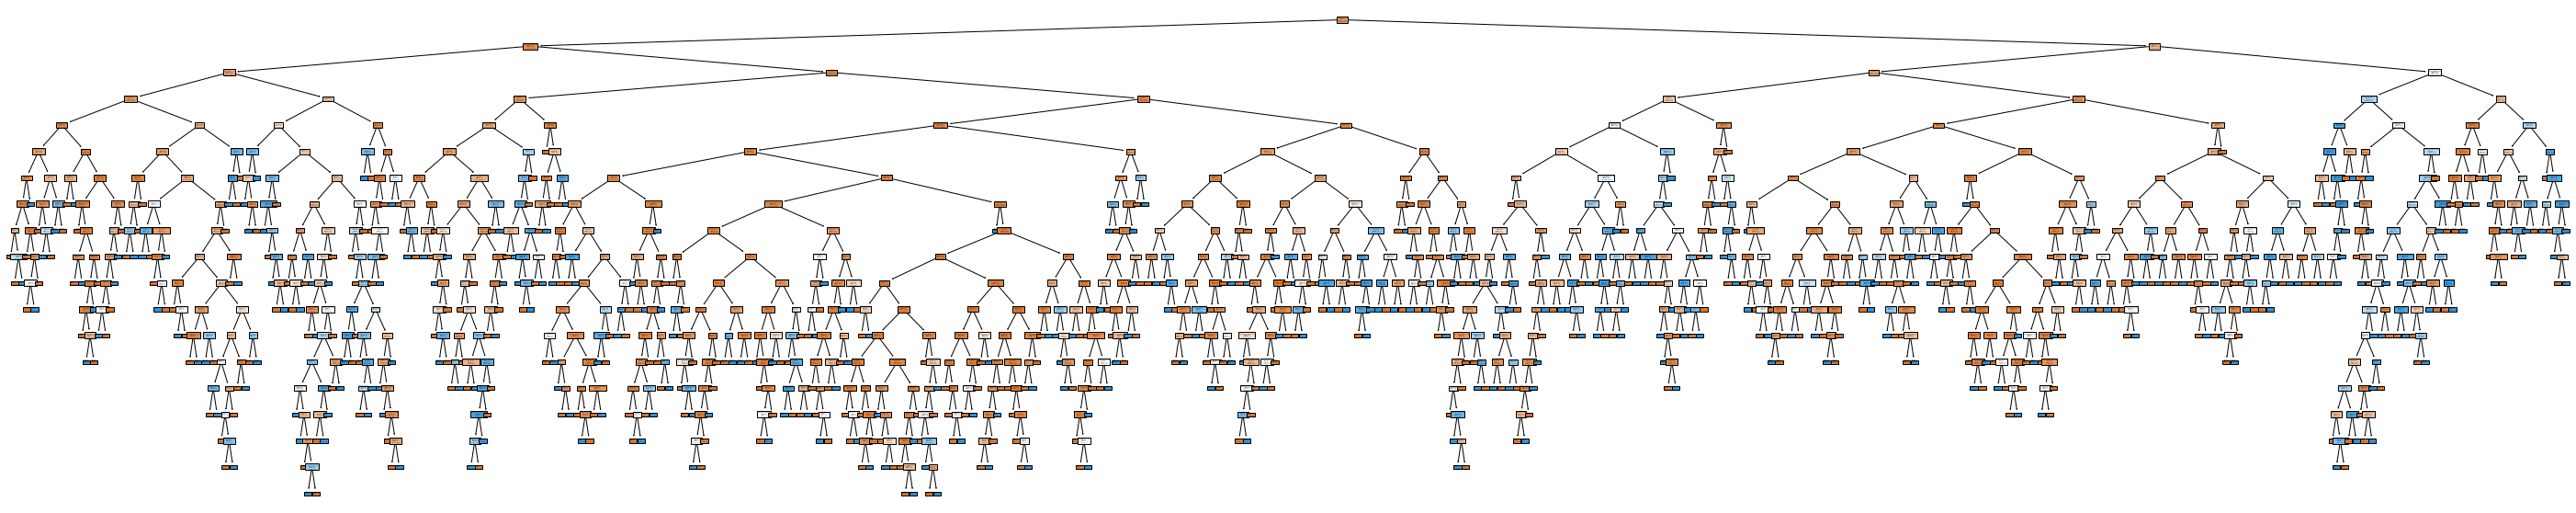

In [76]:
dot_data1 = tree.export_graphviz(dtcl, out_file=None , feature_names = list(X_train))
fig = plt.figure(figsize=(50,10))
_ = tree.plot_tree(dtcl, 
                   feature_names=list(X_train),  
                   filled=True)

In [77]:
y_predict_train = dtcl.predict(X_train)
log_train_acc = dtcl.score(X_train, y_train)
log_train_acc

1.0

In [78]:
y_predict_test = dtcl.predict(X_test)
log_test_acc = dtcl.score(X_test, y_test)
log_test_acc

0.9280639431616341

In [79]:
cflm2=confusion_matrix(y_train, y_predict_train)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



<AxesSubplot:>

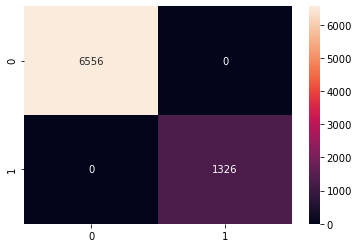

In [80]:
sns.heatmap(cflm2, annot=True,fmt='g')

In [81]:
cflm1=confusion_matrix(y_test, y_predict_test)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2808
           1       0.79      0.78      0.79       570

    accuracy                           0.93      3378
   macro avg       0.87      0.87      0.87      3378
weighted avg       0.93      0.93      0.93      3378



<AxesSubplot:>

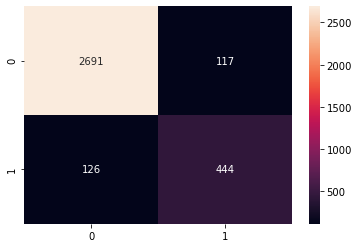

In [82]:
sns.heatmap(cflm1, annot=True, fmt='g')

AUC: 1.000


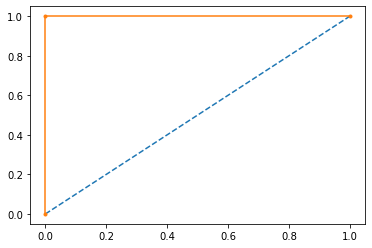

In [83]:
probs = dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.869


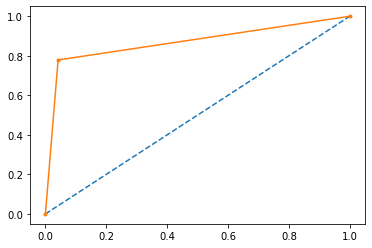

In [84]:
probs = dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

<AxesSubplot:>

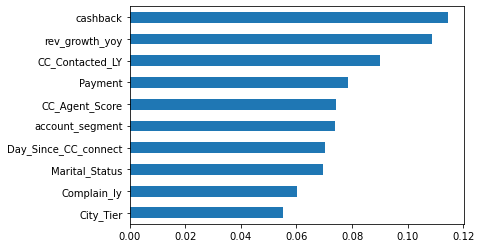

In [85]:
importances = dtcl.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### After tuning hyperparameters

In [86]:
y_predict_train = reg_dtcl.predict(X_train)
log_train_acc = reg_dtcl.score(X_train, y_train)
log_train_acc

0.8681806648058868

In [87]:
y_predict_test = reg_dtcl.predict(X_test)
log_test_acc = reg_dtcl.score(X_test, y_test)
log_test_acc

0.8596802841918295

In [88]:
cflm2=confusion_matrix(y_train, y_predict_train)
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       0.88      0.98      0.92      6556
           1       0.73      0.34      0.46      1326

    accuracy                           0.87      7882
   macro avg       0.81      0.66      0.69      7882
weighted avg       0.86      0.87      0.85      7882



<AxesSubplot:>

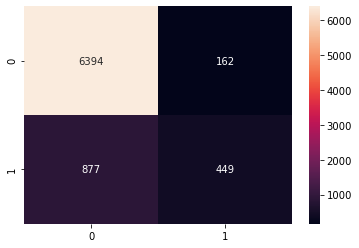

In [89]:
sns.heatmap(cflm2, annot=True,fmt='g' )

In [90]:
cflm1=confusion_matrix(y_test, y_predict_test)
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2808
           1       0.68      0.32      0.43       570

    accuracy                           0.86      3378
   macro avg       0.78      0.64      0.68      3378
weighted avg       0.84      0.86      0.84      3378



<AxesSubplot:>

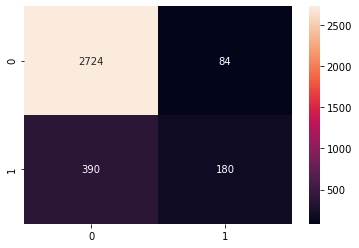

In [91]:
sns.heatmap(cflm1, annot=True,fmt='g')

AUC: 0.825


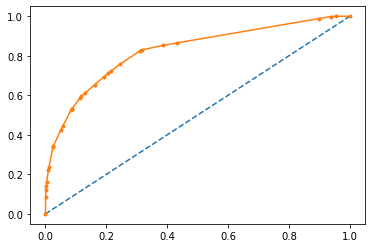

In [92]:
probs = reg_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.794


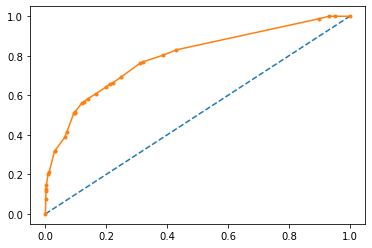

In [93]:
probs = reg_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

<AxesSubplot:>

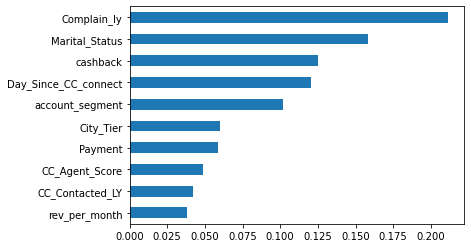

In [94]:
importances = reg_dtcl.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## Random Forest Model

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [97]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6556    0]
 [   0 1326]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6556
           1       1.00      1.00      1.00      1326

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



In [98]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9612196566015394
[[2804    4]
 [ 127  443]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2808
           1       0.99      0.78      0.87       570

    accuracy                           0.96      3378
   macro avg       0.97      0.89      0.92      3378
weighted avg       0.96      0.96      0.96      3378



<AxesSubplot:>

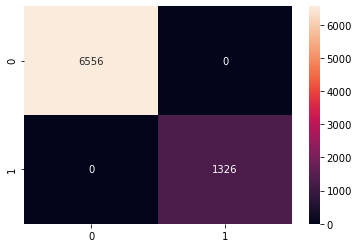

In [99]:
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt='g') 

<AxesSubplot:>

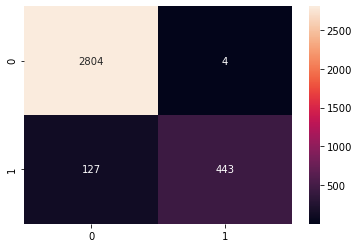

In [100]:
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='g') 

AUC: 1.000


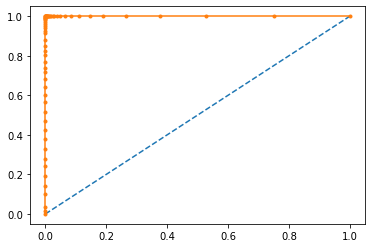

In [101]:
probs = RF_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.986


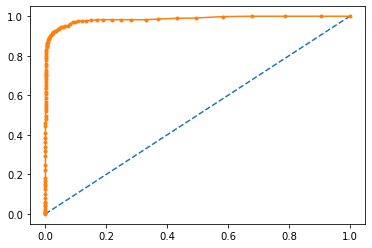

In [102]:
probs = RF_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

In [103]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [104]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [11],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [105]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [106]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

In [107]:
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train,y_train)
    print(rfcl.oob_score_)

0.9511545293072824
0.950647043897488
0.9507739152499366


In [108]:
rfcl=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl=rfcl.fit(X_train,y_train)
rfcl.oob_score_

0.9547069271758437

In [109]:
rfcl=rfcl.fit(X_test,y_test)
rfcl.oob_score_

0.9129662522202486

In [110]:
ytrain_predict = best_grid_rf.predict(X_train)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.933323,0.066677
1,0.838112,0.161888
2,0.963839,0.036161
3,0.971494,0.028506
4,0.721082,0.278918


<AxesSubplot:>

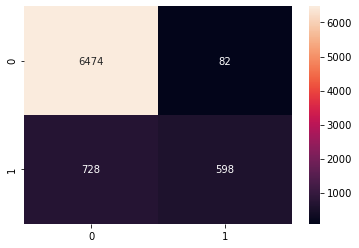

In [111]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g')

In [112]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6556
           1       0.88      0.45      0.60      1326

    accuracy                           0.90      7882
   macro avg       0.89      0.72      0.77      7882
weighted avg       0.90      0.90      0.88      7882



In [113]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.81      0.39      0.53       570

    accuracy                           0.88      3378
   macro avg       0.85      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378



In [114]:
confusion_matrix(y_test, ytest_predict)

array([[2754,   54],
       [ 345,  225]], dtype=int64)

<AxesSubplot:>

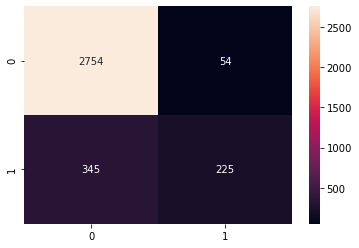

In [115]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='g')

AUC 0.9288041787795045


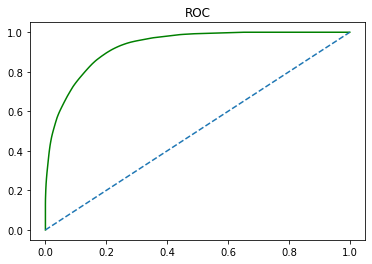

In [116]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('AUC', rf_train_auc)

AUC 0.8648729194781827


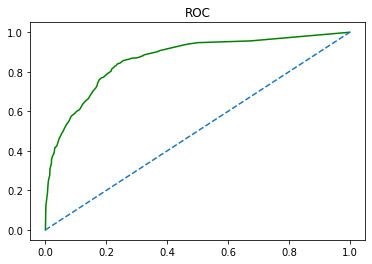

In [117]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('AUC', rf_test_auc)

## LDA Model

In [118]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [120]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)

0.8562547576757168


<AxesSubplot:>

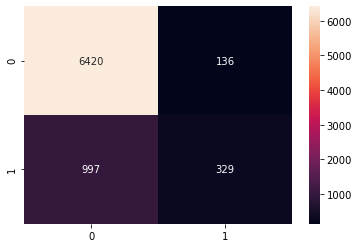

In [121]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,fmt='g')

In [122]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      6556
           1       0.71      0.25      0.37      1326

    accuracy                           0.86      7882
   macro avg       0.79      0.61      0.64      7882
weighted avg       0.84      0.86      0.83      7882



In [123]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)

0.8596802841918295


<AxesSubplot:>

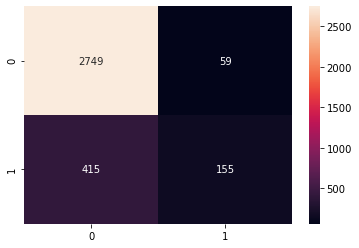

In [124]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,fmt='g')

In [125]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2808
           1       0.72      0.27      0.40       570

    accuracy                           0.86      3378
   macro avg       0.80      0.63      0.66      3378
weighted avg       0.84      0.86      0.83      3378



AUC: 0.796


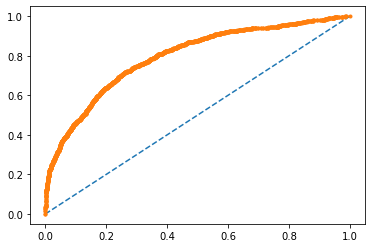

In [126]:
probs = LDA_model.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.798


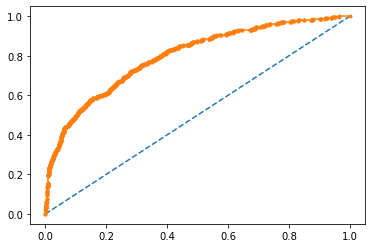

In [127]:
probs = LDA_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

## KNN Model

In [128]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [129]:
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
KNN_model.fit(X_train,y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
KNN_model.fit(X_train,y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 4,metric='euclidean')
KNN_model.fit(X_train,y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=4 is ", KNN_model.score(X_test, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')
KNN_model.fit(X_train,y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.844582593250444
Accuracy Score for K=5 is  0.849911190053286
Accuracy Score for K=4 is  0.844582593250444
Accuracy Score for K=9 is  0.8398460627590291


## Gaussian Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB

In [131]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [132]:
NB_train_predict = NB_model.predict(X_train)
NB_train_acc = NB_model.score(X_train, y_train)   
NB_train_acc 

0.8544785587414362

In [133]:
NB_test_predict = NB_model.predict(X_test)
NB_test_acc = NB_model.score(X_test, y_test)
NB_test_acc

0.8611604499703966

In [134]:
print(classification_report(y_train, NB_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6556
           1       0.62      0.34      0.44      1326

    accuracy                           0.85      7882
   macro avg       0.75      0.65      0.68      7882
weighted avg       0.84      0.85      0.84      7882



In [135]:
print(classification_report(y_test, NB_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2808
           1       0.66      0.36      0.47       570

    accuracy                           0.86      3378
   macro avg       0.77      0.66      0.69      3378
weighted avg       0.84      0.86      0.84      3378



<AxesSubplot:>

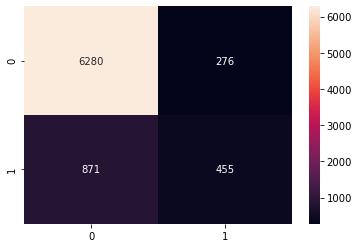

In [136]:
sns.heatmap(confusion_matrix(y_train, NB_train_predict),annot=True,fmt='g') 

<AxesSubplot:>

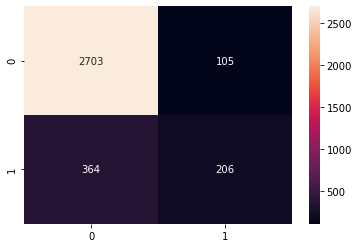

In [137]:
sns.heatmap(confusion_matrix(y_test, NB_test_predict),annot=True,fmt='g') 

AUC 0.7766828677310319


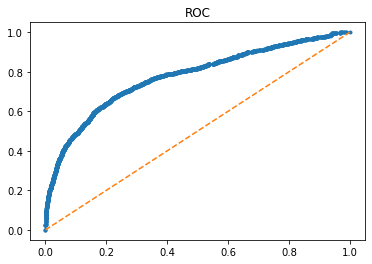

In [138]:
NB_train_fpr, NB_train_tpr,_=roc_curve(y_train,NB_model.predict_proba(X_train)[:,1])
plt.plot(NB_train_fpr, NB_train_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
NB_train_auc=roc_auc_score(y_train,NB_model.predict_proba(X_train)[:,1])
print('AUC', NB_train_auc)

AUC 0.7756803868645973


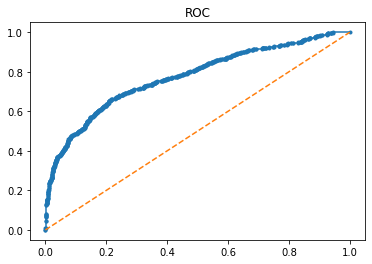

In [139]:
NB_test_fpr, NB_test_tpr,_=roc_curve(y_test,NB_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr, NB_test_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
NB_test_auc=roc_auc_score(y_test,NB_model.predict_proba(X_test)[:,1])
print('AUC', NB_test_auc)

## Gradient Boosting

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [142]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8930474498858157
[[6464   92]
 [ 751  575]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      6556
           1       0.86      0.43      0.58      1326

    accuracy                           0.89      7882
   macro avg       0.88      0.71      0.76      7882
weighted avg       0.89      0.89      0.88      7882



<AxesSubplot:>

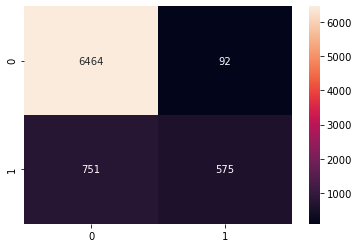

In [143]:
sns.heatmap(confusion_matrix(y_train, y_train_predict),annot=True,fmt='g') 

In [144]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8774422735346359
[[2750   58]
 [ 356  214]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2808
           1       0.79      0.38      0.51       570

    accuracy                           0.88      3378
   macro avg       0.84      0.68      0.72      3378
weighted avg       0.87      0.88      0.86      3378



<AxesSubplot:>

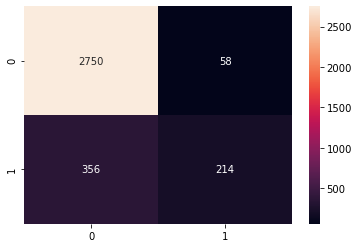

In [145]:
sns.heatmap(confusion_matrix(y_test, y_test_predict),annot=True,fmt='g') 

AUC: 0.903


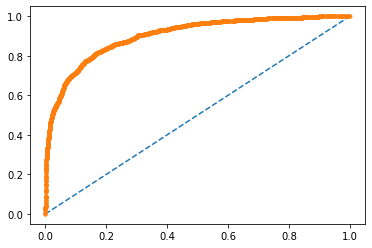

In [146]:
probs = gbcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.877


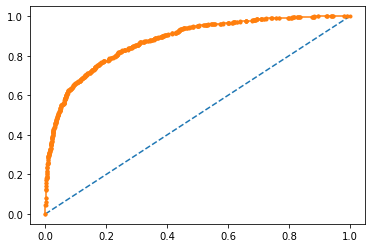

In [147]:
probs = gbcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')
# show the plot
plt.show()

In [148]:
from sklearn.inspection import permutation_importance

## SMOTE

In [149]:
from imblearn.over_sampling import SMOTE

In [150]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Mihir' is not recognized as an internal or external command,
operable program or batch file.


In [151]:
from imblearn.over_sampling import SMOTE 

In [152]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [153]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [154]:
y_train_predict = NB_SM_model.predict(X_train_res)
model_score = NB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7143075045759609
[[4380 2176]
 [1570 4986]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      6556
           1       0.70      0.76      0.73      6556

    accuracy                           0.71     13112
   macro avg       0.72      0.71      0.71     13112
weighted avg       0.72      0.71      0.71     13112



AUC 0.7928723428808395


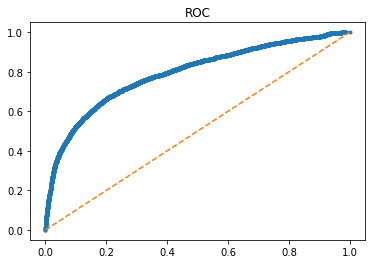

In [155]:
NB_train_fpr, NB_train_tpr,_=roc_curve(y_train_res,NB_SM_model.predict_proba(X_train_res)[:,1])
plt.plot(NB_train_fpr, NB_train_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
NB_train_auc=roc_auc_score(y_train_res,NB_SM_model.predict_proba(X_train_res)[:,1])
print('AUC', NB_train_auc)

In [156]:
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6687388987566607
[[1867  941]
 [ 178  392]]
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      2808
           1       0.29      0.69      0.41       570

    accuracy                           0.67      3378
   macro avg       0.60      0.68      0.59      3378
weighted avg       0.81      0.67      0.71      3378



AUC 0.7501480731743889


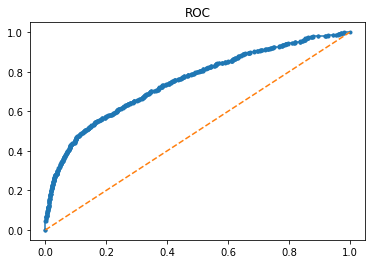

In [157]:
NB_test_fpr, NB_test_tpr,_=roc_curve(y_test,NB_SM_model.predict_proba(X_test)[:,1])
plt.plot(NB_test_fpr, NB_test_tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC')
NB_test_auc=roc_auc_score(y_test,NB_SM_model.predict_proba(X_test)[:,1])
print('AUC', NB_test_auc)

In [160]:
Logistic_SM_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_SM_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [161]:
y_train_predict = Logistic_SM_model.predict(X_train_res)
model_score = Logistic_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7499237339841367
[[4839 1717]
 [1562 4994]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      6556
           1       0.74      0.76      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



AUC: 0.821


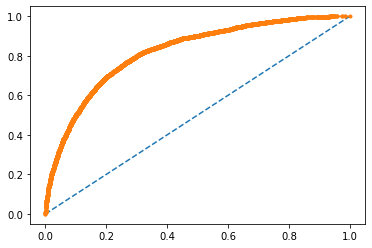

In [162]:
probs = Logistic_SM_model.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

In [163]:
y_test_predict = Logistic_SM_model.predict(X_test)
model_score = Logistic_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test ,y_test_predict))

0.7261693309650681
[[2053  755]
 [ 170  400]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.82      2808
           1       0.35      0.70      0.46       570

    accuracy                           0.73      3378
   macro avg       0.63      0.72      0.64      3378
weighted avg       0.83      0.73      0.76      3378



AUC: 0.789


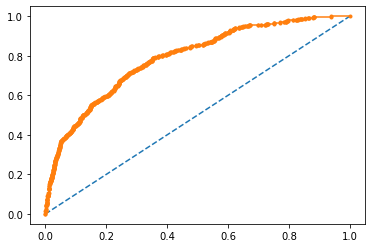

In [172]:
probs = Logistic_SM_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


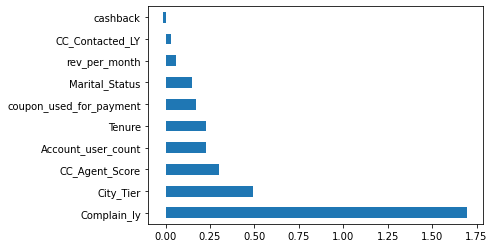

In [173]:
weights = pd.Series(Logistic_SM_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='barh'))

In [166]:
reg_sm_dtcl = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf=10,min_samples_split=30)
reg_sm_dtcl.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=30)

In [167]:
y_predict_train = reg_sm_dtcl.predict(X_train_res)
log_train_acc = reg_sm_dtcl.score(X_train_res, y_train_res)
log_train_acc

0.8200122025625382

In [168]:
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(classification_report(y_train_res, y_predict_train))

[[4839 1717]
 [1562 4994]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      6556
           1       0.88      0.74      0.81      6556

    accuracy                           0.82     13112
   macro avg       0.83      0.82      0.82     13112
weighted avg       0.83      0.82      0.82     13112



In [169]:
y_test_predict = reg_sm_dtcl.predict(X_test)
model_score = reg_sm_dtcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test ,y_test_predict))

0.8256364712847839
[[2515  293]
 [ 296  274]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2808
           1       0.48      0.48      0.48       570

    accuracy                           0.83      3378
   macro avg       0.69      0.69      0.69      3378
weighted avg       0.83      0.83      0.83      3378



AUC: 0.892


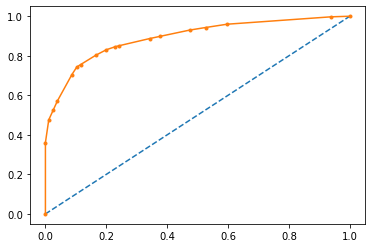

In [193]:
probs = reg_sm_dtcl.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.777


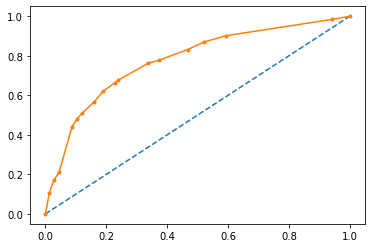

In [194]:
probs = reg_sm_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

<AxesSubplot:>

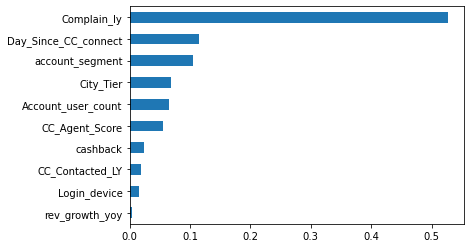

In [170]:
importances = reg_sm_dtcl.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [171]:
LDA_NB_model=LinearDiscriminantAnalysis()
LDA_NB_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [174]:
y_train_predict = LDA_NB_model.predict(X_train_res)
model_score = LDA_NB_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.7475594874923734
[[4798 1758]
 [1552 5004]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6556
           1       0.74      0.76      0.75      6556

    accuracy                           0.75     13112
   macro avg       0.75      0.75      0.75     13112
weighted avg       0.75      0.75      0.75     13112



AUC: 0.820


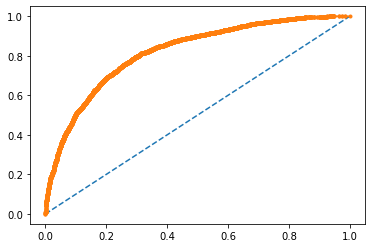

In [175]:
probs = LDA_NB_model.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

In [176]:
y_test_predict = LDA_NB_model.predict(X_test)
model_score = LDA_NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test ,y_test_predict))

0.7202486678507993
[[2034  774]
 [ 171  399]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      2808
           1       0.34      0.70      0.46       570

    accuracy                           0.72      3378
   macro avg       0.63      0.71      0.63      3378
weighted avg       0.82      0.72      0.75      3378



AUC: 0.787


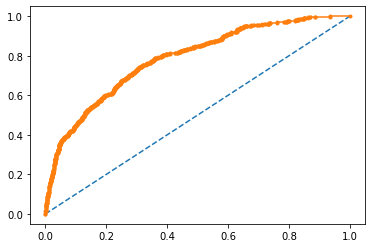

In [177]:
probs = LDA_NB_model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


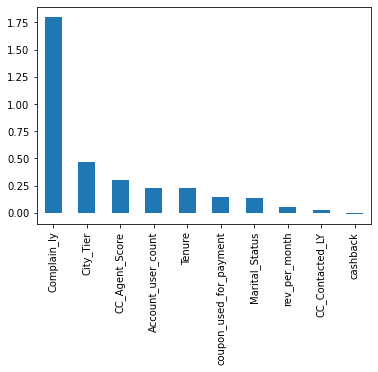

In [178]:
weights = pd.Series(LDA_NB_model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [221]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [11],## 7,8,9
    'min_samples_leaf': [10],## 50,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [100] ## 100,200
}
rfcl = RandomForestClassifier(random_state=1)
grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [222]:
grid_search_rf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10], 'max_features': [11],
                         'min_samples_leaf': [10], 'min_samples_split': [50],
                         'n_estimators': [100]})

In [223]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 100}

In [224]:
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=11, min_samples_leaf=10,
                       min_samples_split=50, random_state=1)

In [225]:
random_state=[0,30,64]
for i in random_state:
    rfcl=RandomForestClassifier(random_state=i,oob_score=True)
    rfcl.fit(X_train_res,y_train_res)
    print(rfcl.oob_score_)

0.9797895057962172
0.9790268456375839
0.9786455155582673


In [226]:
rfcl_sm=RandomForestClassifier(n_estimators=500,random_state=1,oob_score=True,n_jobs=-1)
rfcl_sm=rfcl_sm.fit(X_train_res,y_train_res)
rfcl_sm.oob_score_

0.9821537522879805

In [227]:
ytrain_predict = best_grid_rf.predict(X_train_res)
ytest_predict = best_grid_rf.predict(X_test)
ytrain_predict_prob=best_grid_rf.predict_proba(X_train_res)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.843121,0.156879
1,0.825002,0.174998
2,0.952846,0.047154
3,0.899258,0.100742
4,0.578767,0.421233


In [228]:
print(metrics.confusion_matrix(y_train_res, ytrain_predict))
print(classification_report(y_train_res,ytrain_predict))

[[6124  432]
 [ 496 6060]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6556
           1       0.93      0.92      0.93      6556

    accuracy                           0.93     13112
   macro avg       0.93      0.93      0.93     13112
weighted avg       0.93      0.93      0.93     13112



In [229]:
print(metrics.confusion_matrix(y_test, ytest_predict))
print(classification_report(y_test,ytest_predict))

[[2597  211]
 [ 205  365]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2808
           1       0.63      0.64      0.64       570

    accuracy                           0.88      3378
   macro avg       0.78      0.78      0.78      3378
weighted avg       0.88      0.88      0.88      3378



<AxesSubplot:>

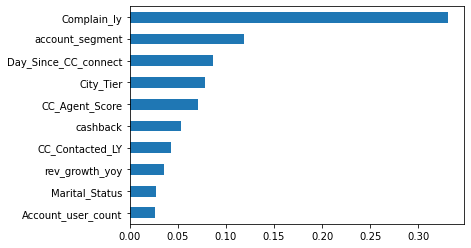

In [230]:
importances = best_grid_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

AUC: 0.984


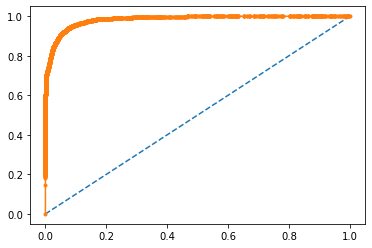

In [231]:
probs = best_grid_rf.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.912


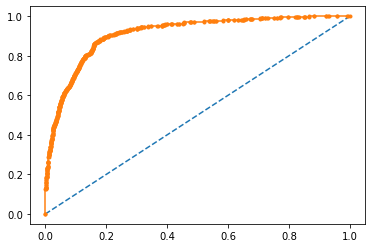

In [232]:
probs = best_grid_rf.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()

In [233]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

In [190]:
y_train_predict = gbcl.predict(X_train_res)
model_score = gbcl.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.9017693715680293
[[6116  440]
 [ 848 5708]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6556
           1       0.93      0.87      0.90      6556

    accuracy                           0.90     13112
   macro avg       0.90      0.90      0.90     13112
weighted avg       0.90      0.90      0.90     13112



In [191]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8661930136175252
[[2621  187]
 [ 265  305]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2808
           1       0.62      0.54      0.57       570

    accuracy                           0.87      3378
   macro avg       0.76      0.73      0.75      3378
weighted avg       0.86      0.87      0.86      3378



<AxesSubplot:>

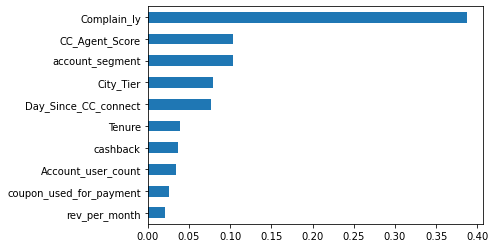

In [192]:
importances = gbcl.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

AUC: 0.966


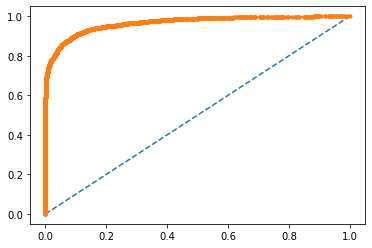

In [234]:
probs = gbcl.predict_proba(X_train_res)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_train_auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % log_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_train_fpr, log_train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_train_fpr, log_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.862


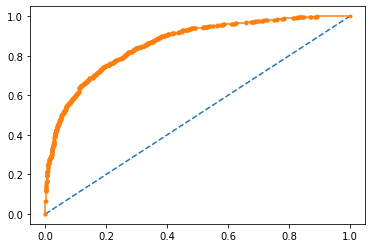

In [235]:
probs = gbcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
log_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % log_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
log_test_fpr, log_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(log_test_fpr, log_test_tpr, marker='.')

# show the plot
plt.show()